# Titanic Data Analysis

The dataset used here is from kaggle: [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic)

### Data Dictionary

| Variable | Definition | Key | 
| -------- |:----------:| ---:|
| survival | Survival | 0 = No, 1 = Yes |
| pclass | Ticket class | 1 = 1st, 2 = 2nd, 3 = 3rd |
| sex | Sex | -	|
| Age | Age in years | - | 
| sibsp | # of siblings / spouses aboard the Titanic | - | 	
| parch | # of parents / children aboard the Titanic | - | 
| ticket | Ticket number | - | 
| fare | Passenger fare | -	| 
| cabin| Cabin number | - | 
| embarked | Port of Embarkation | C = Cherbourg, Q = Queenstown, S = Southampton | 

**`We will use logistic regression to make a basic predictive model.`**

Titanic Project


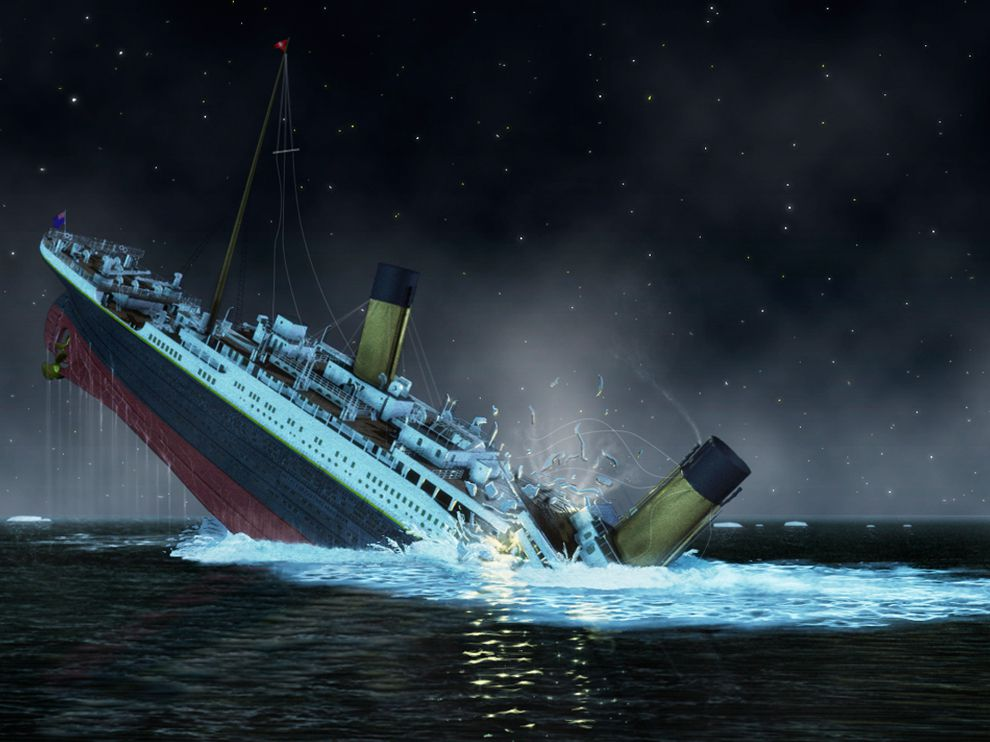

In [2]:
print('Titanic Project')
from IPython.display import Image
url = 'https://media.nationalgeographic.org/assets/photos/000/273/27302.jpg'
Image(url,width=500, height=300)

In [2]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

# Dataviz
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [144]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
titanic_dframe = pd.read_csv('titanic.csv')
titanic_dframe

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


**Checking for missing data...**

In [4]:
titanic_dframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


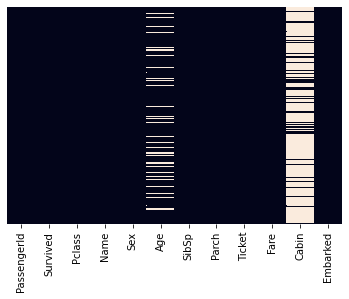

In [5]:
sns.heatmap(titanic_dframe.isnull(), yticklabels=False, cbar=False)

#### Analysis #1
Basic analysis on passengers.

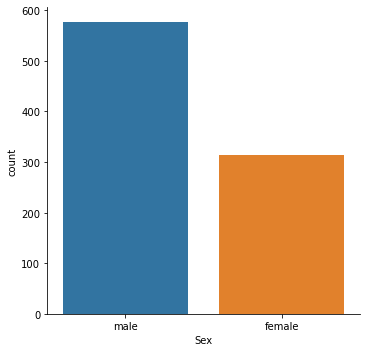

In [6]:
sns.catplot('Sex',data=titanic_dframe,kind='count')

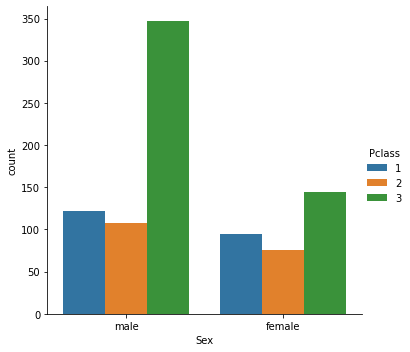

In [7]:
sns.catplot('Sex',data=titanic_dframe,kind='count',hue='Pclass')

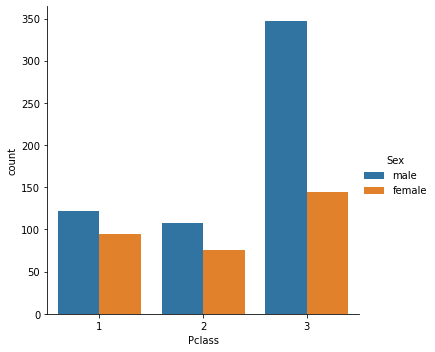

In [8]:
sns.catplot('Pclass',data=titanic_dframe,kind='count',hue='Sex')

In [9]:
def child(passenger):
    age,sex = passenger
    if age < 18:
        return 'child'
    else:
        return sex

In [10]:
titanic_dframe['Person'] = titanic_dframe[['Age','Sex']].apply(child,axis=1)

In [16]:
titanic_dframe.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


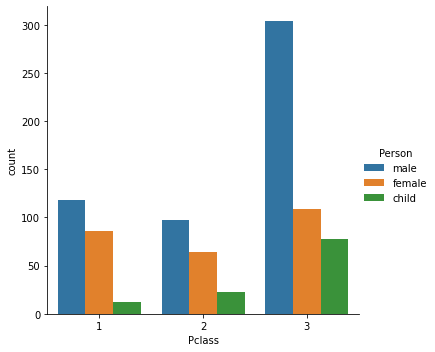

In [17]:
sns.catplot('Pclass',data=titanic_dframe,kind='count',hue='Person')

In [18]:
titanic_dframe['Age'].mean()

29.69911764705882

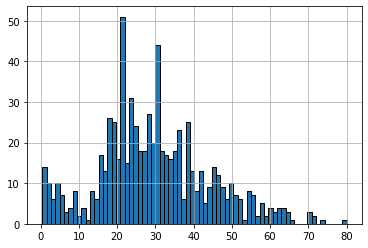

In [19]:
titanic_dframe['Age'].hist(bins=70,edgecolor='black')

In [20]:
titanic_dframe['Person'].value_counts()

male      519
female    259
child     113
Name: Person, dtype: int64

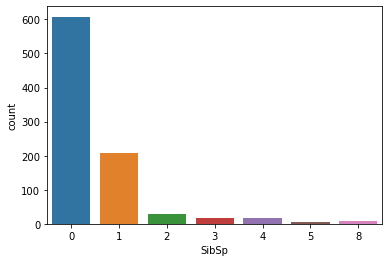

In [22]:
sns.countplot(x='SibSp',data=titanic_dframe)

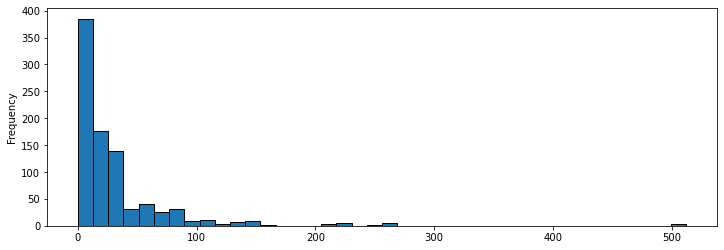

In [27]:
titanic_dframe['Fare'].plot.hist(bins=40,edgecolor='k',figsize=(12,4))

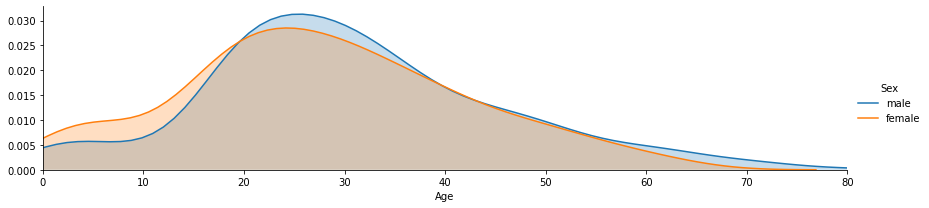

In [28]:
fig = sns.FacetGrid(titanic_dframe,hue='Sex',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)

oldest = titanic_dframe['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

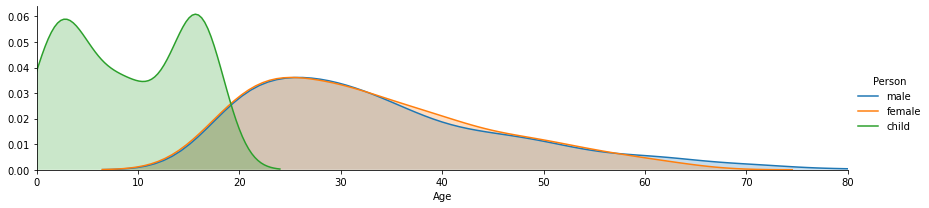

In [29]:
fig = sns.FacetGrid(titanic_dframe,hue='Person',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)

oldest = titanic_dframe['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

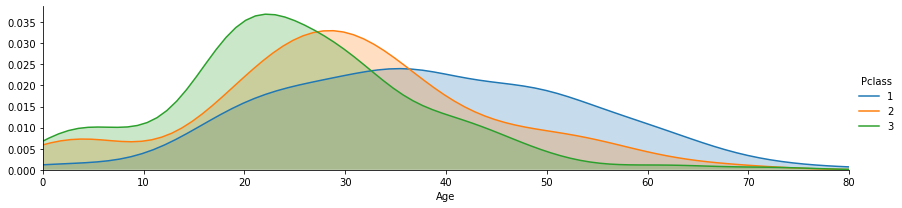

In [30]:
fig = sns.FacetGrid(titanic_dframe,hue='Pclass',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)

oldest = titanic_dframe['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

#### Analysis #2
Deck to Class.

In [11]:
deck = titanic_dframe['Cabin'].dropna()

In [12]:
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

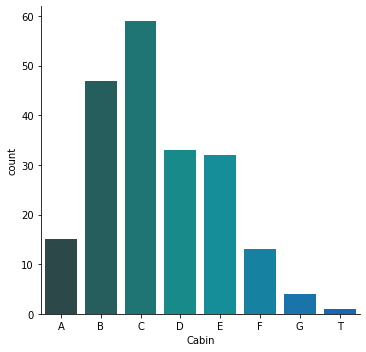

In [13]:
levels = [level[0] for level in deck]
levels.sort()

cabin_dframe = DataFrame(levels)
cabin_dframe.columns = ['Cabin']

sns.catplot('Cabin',data=cabin_dframe,kind='count', palette='winter_d')

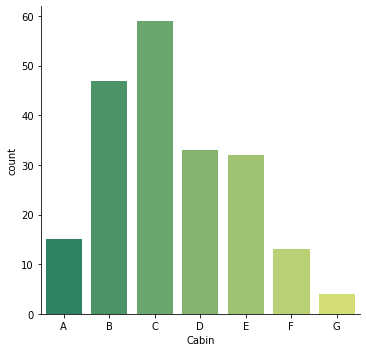

In [14]:
cabin_dframe = cabin_dframe[cabin_dframe.Cabin != 'T']

sns.catplot('Cabin',data=cabin_dframe,kind='count', palette='summer')

#### Analysis #3
Cities from which people came.

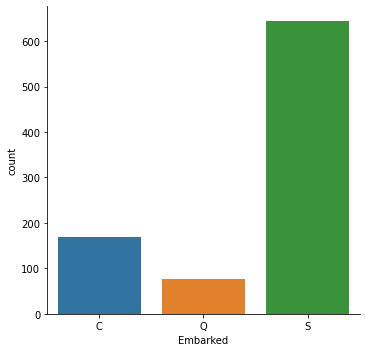

In [35]:
sns.catplot('Embarked',data=titanic_dframe,kind='count',order=['C','Q','S'])

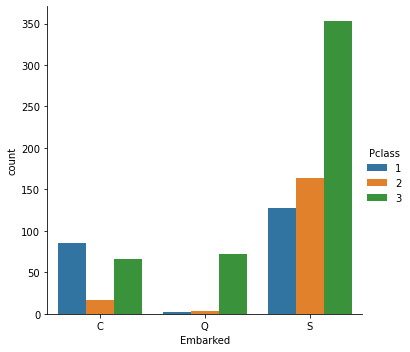

In [36]:
sns.catplot('Embarked',data=titanic_dframe,kind='count',hue='Pclass',order=['C','Q','S'])

#### Analysis #4
Who were alone and who were with family.

In [15]:
titanic_dframe['Alone'] = titanic_dframe['SibSp'] + titanic_dframe['Parch']

In [16]:
titanic_dframe['Alone']

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Name: Alone, Length: 891, dtype: int64

In [17]:
titanic_dframe['Alone'].loc[titanic_dframe['Alone']>0] = 'With Family'
titanic_dframe['Alone'].loc[titanic_dframe['Alone']==0] = 'Alone'

C:\Users\Sarvesh Joshi\Downloads\Anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [40]:
titanic_dframe.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


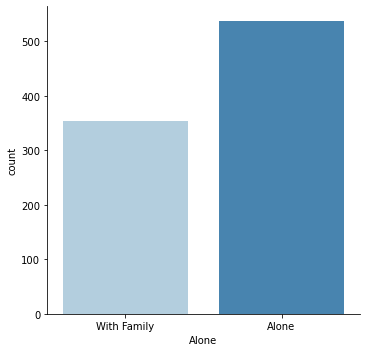

In [41]:
sns.catplot('Alone',data=titanic_dframe,kind='count',palette='Blues')

#### Analysis #4
Factors of Survival.

In [18]:
titanic_dframe['Survivor'] = titanic_dframe['Survived'].map({0:'no',1:'yes'})

In [43]:
titanic_dframe.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone,Survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family,no
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family,yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family,yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone,no


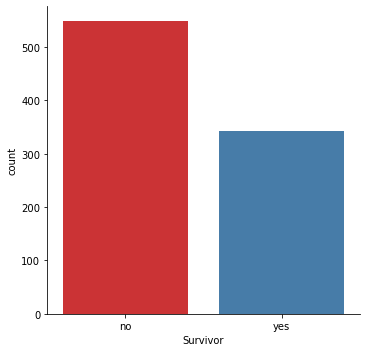

In [44]:
sns.catplot('Survivor',data=titanic_dframe,kind='count',palette='Set1')

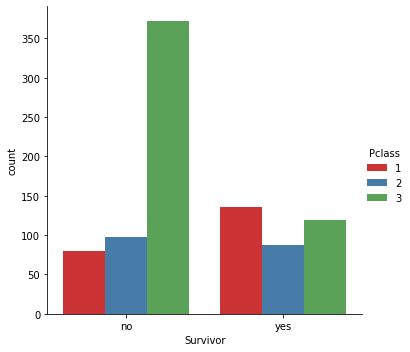

In [45]:
sns.catplot('Survivor',data=titanic_dframe,kind='count',hue='Pclass',palette='Set1')

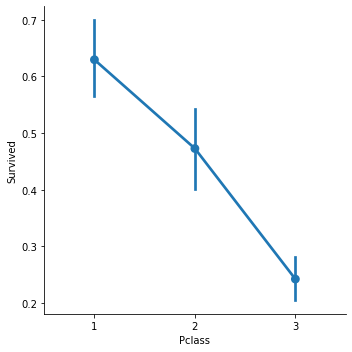

In [46]:
sns.catplot('Pclass','Survived',data=titanic_dframe,kind='point')

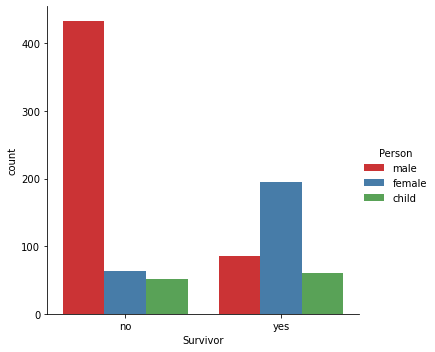

In [47]:
sns.catplot('Survivor',data=titanic_dframe,kind='count',hue='Person',palette='Set1')

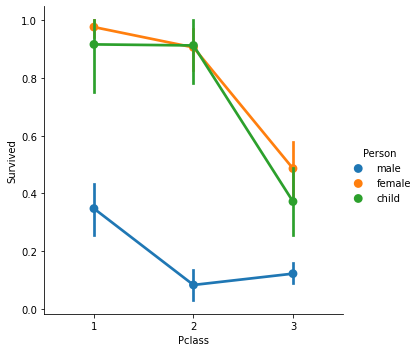

In [48]:
sns.catplot('Pclass','Survived',data=titanic_dframe,hue='Person',kind='point')

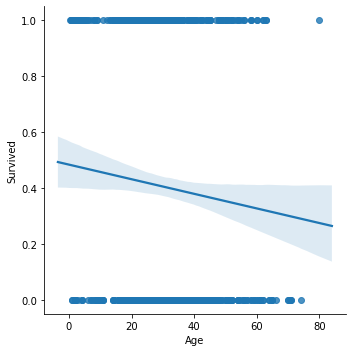

In [49]:
sns.lmplot('Age','Survived',data=titanic_dframe)

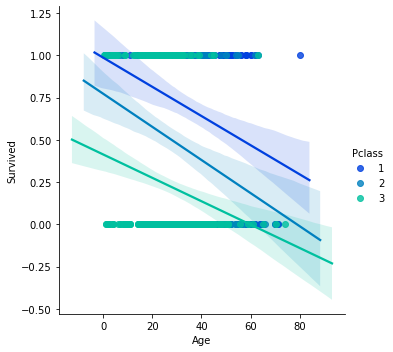

In [50]:
sns.lmplot('Age','Survived',hue='Pclass',data=titanic_dframe,palette='winter')

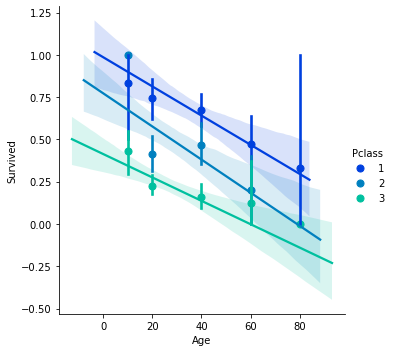

In [51]:
age_bins = [10,20,40,60,80]
sns.lmplot('Age','Survived',hue='Pclass',data=titanic_dframe,palette='winter',x_bins=age_bins)

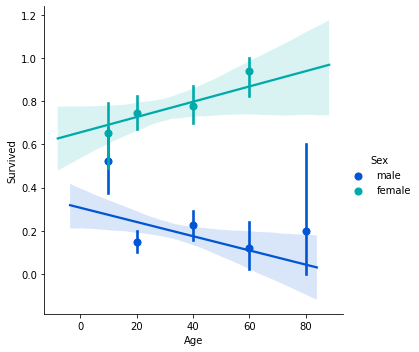

In [52]:
sns.lmplot('Age','Survived',hue='Sex',data=titanic_dframe,palette='winter',x_bins=age_bins)

#### Analysis #6
Deck and survival rate.

In [53]:
titanic_dframe.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone,Survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family,no
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family,yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family,yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone,no


In [20]:
# titanic_dframe.drop('Deck',axis=1)

In [57]:
cabin_sur = titanic_dframe[['Cabin','Survived']]

In [62]:
cabin_sur.dropna(inplace=True)

C:\Users\Sarvesh Joshi\Downloads\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [63]:
cabin_sur

,Cabin,Survived
1,C85,1
3,C123,1
6,E46,0
10,G6,1
11,C103,1
...,...,...
871,D35,1
872,B51 B53 B55,0
879,C50,1
887,B42,1


In [64]:
lvls = []
for lvl in cabin_sur.Cabin:
    lvls.append(lvl[0])
lvls = np.array(lvls)

In [65]:
cabin_sur['Cabin_lvl'] = lvls

C:\Users\Sarvesh Joshi\Downloads\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [66]:
cabin_sur

,Cabin,Survived,Cabin_lvl
1,C85,1,C
3,C123,1,C
6,E46,0,E
10,G6,1,G
11,C103,1,C
...,...,...,...
871,D35,1,D
872,B51 B53 B55,0,B
879,C50,1,C
887,B42,1,B


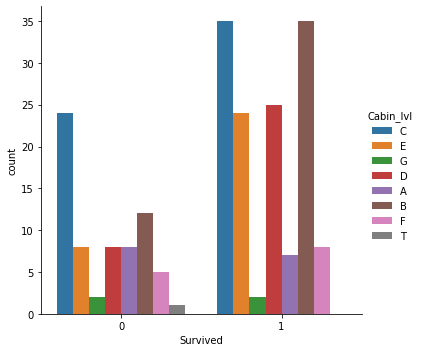

In [67]:
sns.catplot('Survived',data=cabin_sur,kind='count',hue='Cabin_lvl')

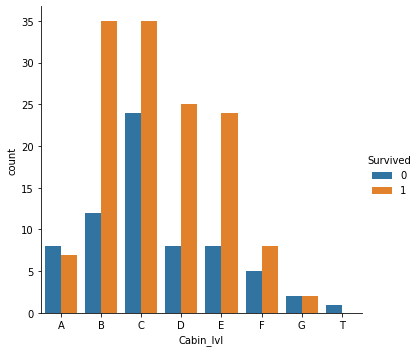

In [68]:
sns.catplot('Cabin_lvl',data=cabin_sur,kind='count',hue='Survived',order=['A','B','C','D','E','F','G','T'])

#### Analysis #7
Did having a family member increase the odds of surviving the crash?

In [70]:
titanic_dframe.drop('Deck',axis=1,inplace=True)

In [71]:
titanic_dframe.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone,Survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family,no
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family,yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family,yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone,no


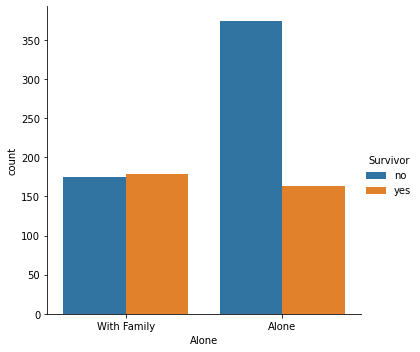

In [72]:
sns.catplot('Alone',data=titanic_dframe,kind='count',hue='Survivor')

- Filling the missing values

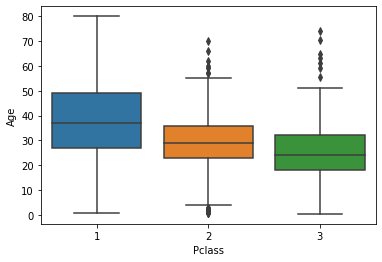

In [73]:
sns.boxplot(x='Pclass', y='Age', data=titanic_dframe)

In [76]:
print('Class 1:',titanic_dframe[titanic_dframe["Pclass"] == 1]['Age'].mean())
print('Class 2:',titanic_dframe[titanic_dframe["Pclass"] == 2]['Age'].mean())
print('Class 3:',titanic_dframe[titanic_dframe["Pclass"] == 3]['Age'].mean())

Class 1: 38.233440860215055
Class 2: 29.87763005780347
Class 3: 25.14061971830986


In [21]:
def compute_age(cols):
    Age=cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 38
        elif Pclass == 2:
            return 30
        elif Pclass == 3:
            return 25
    else:
        return Age

In [22]:
titanic_dframe['Age'] = titanic_dframe[['Age','Pclass']].apply(compute_age,axis=1)

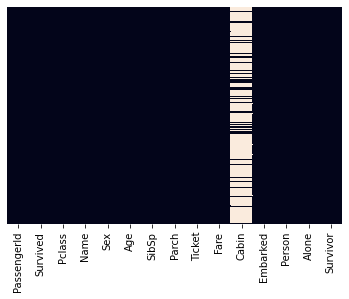

In [23]:
sns.heatmap(titanic_dframe.isnull(), yticklabels=False, cbar=False)

Here we have filled the missing values in Age column

In [24]:
titanic_dframe.drop(['Cabin'],axis=1,inplace=True)

In [25]:
titanic_dframe.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            891
SibSp          891
Parch          891
Ticket         891
Fare           891
Embarked       889
Person         891
Alone          891
Survivor       891
dtype: int64

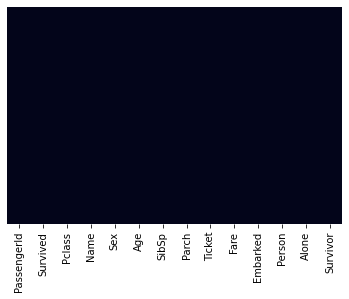

In [26]:
sns.heatmap(titanic_dframe.isnull(), yticklabels=False, cbar=False)

In [27]:
sex = pd.get_dummies(titanic_dframe['Sex'],drop_first=True)

In [28]:
embarked = pd.get_dummies(titanic_dframe['Embarked'],drop_first=True)

In [29]:
titanic_dframe = pd.concat([titanic_dframe,sex,embarked],axis=1)

In [30]:
titanic_dframe.drop(['PassengerId','Name','Sex','Ticket','Embarked','Person','Alone','Survivor'],axis=1,inplace=True)

In [31]:
titanic_dframe.count()

Survived    891
Pclass      891
Age         891
SibSp       891
Parch       891
Fare        891
male        891
Q           891
S           891
dtype: int64

In [32]:
titanic_dframe.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [33]:
X = titanic_dframe.drop('Survived',axis=1)

In [34]:
y = titanic_dframe['Survived']

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=120)

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
logm = LogisticRegression()

In [54]:
logm.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [55]:
predictions = logm.predict(X_test)

In [56]:
from sklearn.metrics import classification_report,confusion_matrix

In [57]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.80      0.87      0.84       179
          1       0.69      0.57      0.63        89

avg / total       0.77      0.77      0.77       268



In [58]:
confusion_matrix(y_test,predictions)

array([[156,  23],
       [ 38,  51]], dtype=int64)

**Test Data**

In [64]:
test_dframe = pd.read_csv('titanic_test.csv')

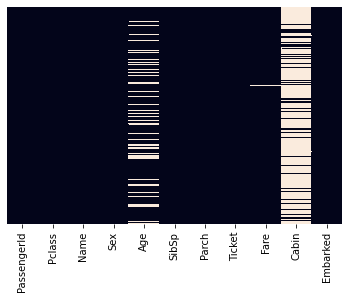

In [65]:
sns.heatmap(test_dframe.isnull(),yticklabels=False,cbar=False)

In [66]:
test_dframe.drop(['Cabin'],axis=1,inplace=True)

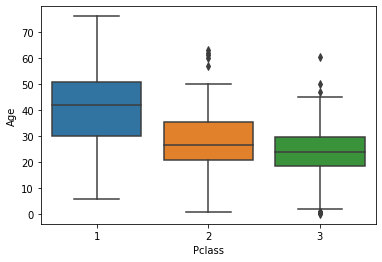

In [67]:
sns.boxplot(x='Pclass',y='Age',data=test_dframe)

In [68]:
print('Class 1:',test_dframe[test_dframe["Pclass"] == 1]['Age'].mean())
print('Class 2:',test_dframe[test_dframe["Pclass"] == 2]['Age'].mean())
print('Class 3:',test_dframe[test_dframe["Pclass"] == 3]['Age'].mean())

Class 1: 40.91836734693877
Class 2: 28.7775
Class 3: 24.02794520547945


In [69]:
def compute_age(cols):
    Age=cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 41
        elif Pclass == 2:
            return 29
        elif Pclass == 3:
            return 24
    else:
        return Age

In [70]:
test_dframe['Age'] = test_dframe[['Age','Pclass']].apply(compute_age,axis=1)

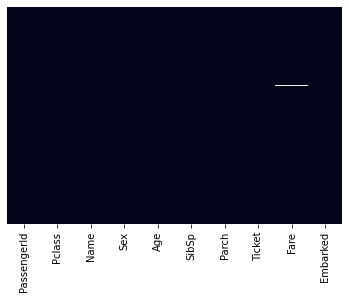

In [71]:
sns.heatmap(test_dframe.isnull(), yticklabels=False, cbar=False)

In [72]:
test_dframe.dropna(inplace=True)

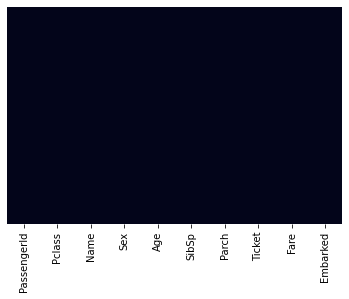

In [73]:
sns.heatmap(test_dframe.isnull(), yticklabels=False, cbar=False)

In [74]:
sex = pd.get_dummies(test_dframe['Sex'],drop_first=True)

In [75]:
embarked = pd.get_dummies(test_dframe['Embarked'],drop_first=True)

In [76]:
test_dframe = pd.concat([test_dframe,sex,embarked],axis=1)

In [51]:
test_dframe.drop(['PassengerId','Name','Sex','Ticket','Embarked'],axis=1,inplace=True)

In [52]:
test_dframe.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,34.5,0,0,7.8292,1,1,0
1,3,47.0,1,0,7.0000,0,0,1
2,2,62.0,0,0,9.6875,1,1,0
3,3,27.0,0,0,8.6625,1,0,1
4,3,22.0,1,1,12.2875,0,0,1


In [60]:
test_predictions = logm.predict(test_dframe)

In [61]:
type(test_predictions)

numpy.ndarray

In [103]:
test_pred = pd.DataFrame(test_predictions,columns=['Predictions'],dtype=object)

In [104]:
test_pred

,Predictions
0,0
1,0
2,0
3,0
4,1
...,...
412,0
413,1
414,0
415,0


In [77]:
pass_id = test_dframe['PassengerId']

In [79]:
type(pass_id)

pandas.core.series.Series

In [105]:
pass_id = pd.DataFrame(pass_id,columns=['PassengerId'],dtype=object)

In [106]:
pass_id

,PassengerId
0,892
1,893
2,894
3,895
4,896
...,...
413,1305
414,1306
415,1307
416,1308


In [107]:
test_pred = pass_id.join(test_pred)

In [108]:
test_pred.head(10)

,PassengerId,Predictions
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


**These are the predictions on test data where**
* **0 = not survived** 
* **1 = survived**
<br />
<br />
The accuracy of the model was not that high we could have increased it further by some other classification technique.